# 📊 Analyse complète du dataset AI Ghibli Trend

**Ce notebook présente une analyse complète d’un jeu de données lié aux images générées dans le style **Ghibli**, comprenant 15 questions d’analyse.** 

📊 15 questions d’analyse de données

## Question 1: Quelle est la distribution des scores de tendance ?

## Question 2: Comment le score de tendance évolue-t-il avec le temps ?

## Question 3: Le nombre d’images générées a-t-il augmenté dans le temps ?

## Question 4: Quels sont les types d’images les plus générés ?

## Question 5: Quelle est la distribution des types d’images selon le score de tendance ?

## Question 6: Les images les plus populaires sont-elles concentrées sur un certain type ?

## Question 7: Quel est l’engagement moyen (likes, comments, shares) par type d’image ?

## Question 8: Y a-t-il une corrélation entre les likes, shares, comments et le score de tendance ?

## Question 9: Quels sont les créateurs les plus prolifiques ?

## Question 10: Les créateurs les plus prolifiques ont-ils aussi les scores les plus élevés ?

## Question 11: Quelles plateformes ont généré les images avec les scores les plus élevés ?

## Question 12: Existe-t-il une saisonnalité dans la création d’images ?

## Question 13: Le style ou l’image type évolue-t-il dans le temps ?

## Question 14: Les partages ont-ils un poids plus fort que les commentaires ou likes ?

## Question 15: Y a-t-il des outliers extrêmes dans les données ?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")
df

,image_id,user_id,prompt,likes,shares,comments,platform,generation_time,gpu_usage,file_size_kb,resolution,style_accuracy_score,is_hand_edited,ethical_concerns_flag,creation_date,top_comment
0,77ce5c72-eb45-4651-bcb1-c0677c0fceaf,6a7adf3d,Studio Ghibli-inspired ocean with giant fish,916,410,555,Reddit,4.80,49,1684,1024x1024,89,Yes,Yes,2025-03-11,"So nostalgic, feels like childhood memories. 🎥..."
1,7d66c67f-0d11-4ef9-895c-d865ef11fe40,523b8706,Ghibli-style village at sunset,2965,1361,417,Reddit,11.11,81,2808,1024x1024,92,Yes,No,2025-03-11,Absolutely stunning! Love the details. 🎨 #5729
2,d7978afd-3932-4cce-9a21-5f9bf2bc1f64,0e02592a,A lone traveler exploring an enchanted ruin,4727,655,785,Instagram,5.56,41,1800,2048x2048,61,No,No,2025-03-06,Is this AI or hand-painted? Incredible! #8001
3,cb34636a-a15c-4b15-999c-759dbb8896fe,9ed78a42,Spirited Away-style bustling market street,1629,1954,212,TikTok,12.45,88,479,2048x2048,76,No,No,2025-03-23,Is this AI or hand-painted? Incredible! #5620
4,7511fbb8-db05-4584-a3a4-e8bb525ed58b,69ec8f02,Magical Ghibli forest with floating lanterns,2573,1281,913,TikTok,4.80,64,1789,512x512,58,No,Yes,2025-03-06,This looks straight out of a Ghibli movie! 🌟 #...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,135267ba-3941-42ae-a421-3be20e3856d1,c80e6866,Anime-style train passing through a fantasy world,1634,1328,624,TikTok,10.56,73,3255,1024x1024,96,Yes,Yes,2025-03-20,I can't believe this is AI-generated! 😲 #3419
496,b2ced831-5b08-403d-bfb3-b562e256f359,81669630,Serene meadow with a tiny spirit creature,4198,833,812,Reddit,8.41,89,4710,1024x1024,83,Yes,No,2025-03-28,The lighting and atmosphere are perfect. 💡 #3348
497,8c87b8aa-b304-43cf-82b3-3a199367ec17,258613ea,Ghibli-style mountain with floating islands,1237,1703,530,Reddit,12.05,86,1545,2048x2048,81,Yes,No,2025-03-16,The lighting and atmosphere are perfect. 💡 #5209
498,04dba0f4-fdb7-4341-8bb6-dca5a595cd81,23b56439,"Cozy tea shop in a mystical town, Ghibli style",1852,1158,259,Twitter,5.86,56,2796,512x512,78,Yes,No,2025-03-01,Is this AI or hand-painted? Incredible! #1163


#**Nettoyage des données**

In [5]:
df=pd.read_csv('projet_tutore.csv')

has_duplicates = df.duplicated().any()
print("Présence de doublons :", has_duplicates)

Présence de doublons : False


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier CSV (à adapter si chemin différent)
df = pd.read_csv("projet_tutore.csv")

# Transformation de la date
df['creation_date'] = pd.to_datetime(df['creation_date'])

#pd.to_datetime est une fonction de la bibliothèque Pandas (souvent importée sous l'alias pd) qui est utilisée pour convertir des données
#(généralement des chaînes de caractères ou des nombres) en objets de type datetime.


# Création d’un score de tendance simple
df['trending_score'] = df['likes'] + df['shares'] + df['comments']


## ❓ Question 1: Quelle est la distribution des scores de tendance ?

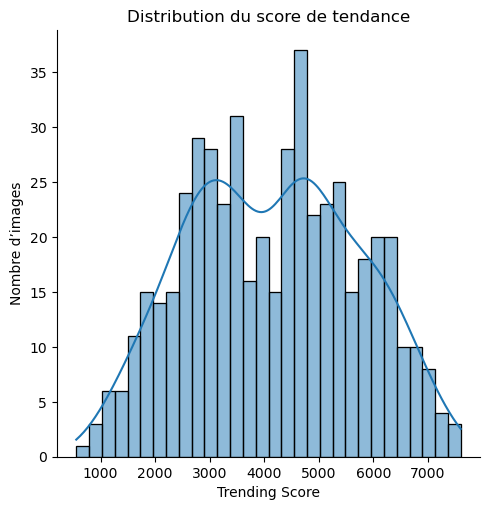

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")

# Création d’un score de tendance simple
df['trending_score'] = df['likes'] + df['shares'] + df['comments']

# Distribution du score de tendance
sns.displot(df['trending_score'], bins=30, kde=True)
plt.title("Distribution du score de tendance")
plt.xlabel("Trending Score")
plt.ylabel("Nombre d’images")
plt.show()


## ❓ Question 2: Comment le score de tendance évolue-t-il avec le temps ?

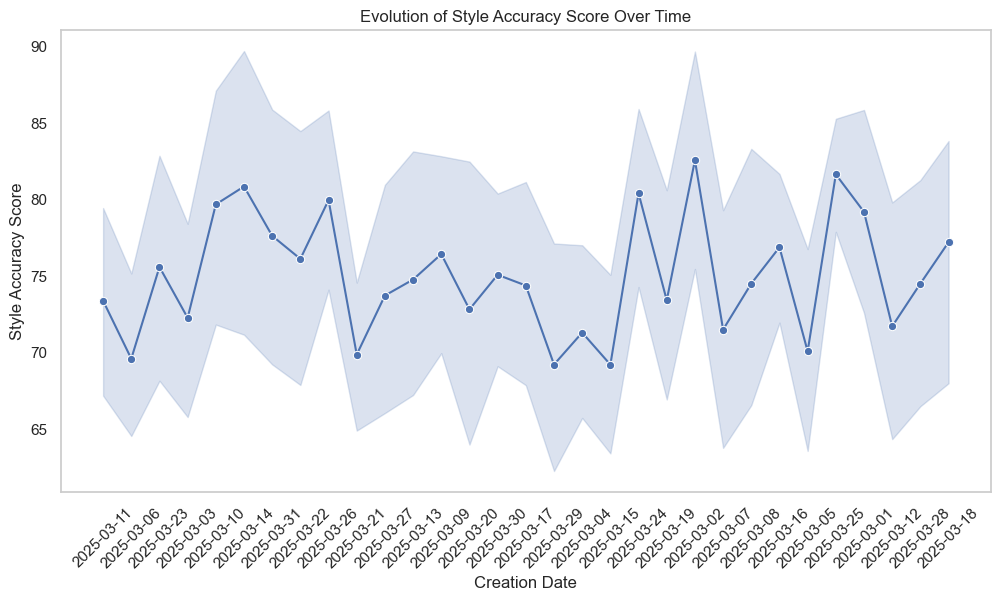

In [49]:
# Question 2: Analyzing how the style accuracy score evolves over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='creation_date', y='style_accuracy_score', marker='o')
plt.title('Evolution of Style Accuracy Score Over Time')
plt.xlabel('Creation Date')
plt.ylabel('Style Accuracy Score')
plt.xticks(rotation=45)
plt.show()

## ❓ Question 3 repartion des like par plate forme

Text(0, 0.5, 'Likes')

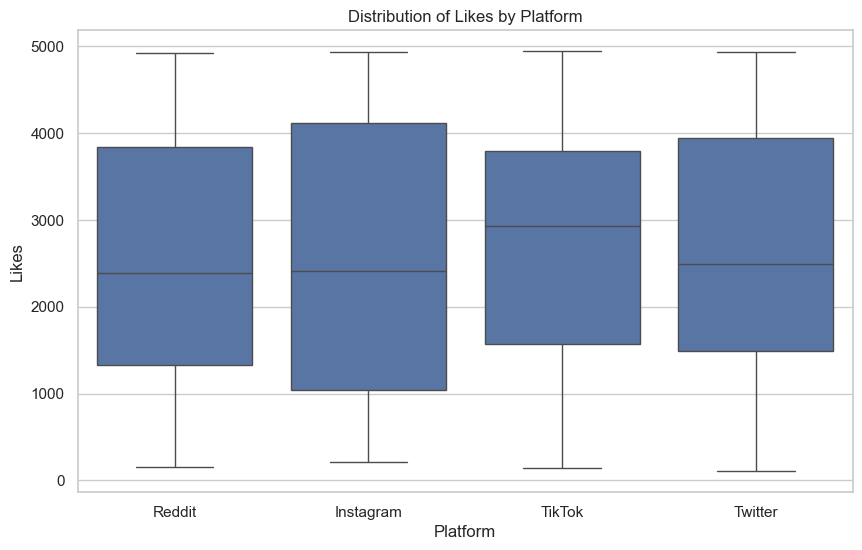

In [14]:
# Analyzing the distribution of likes across different platforms
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style for the plot
sns.set(style='whitegrid')

# Creating a boxplot to visualize the distribution of likes by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='likes', data=df)
plt.title('distribution des likes par plateforme')
plt.xlabel('Platform')
plt.ylabel('Likes')

## ❓ Question 4: Quels sont les types d’images les plus générés ?

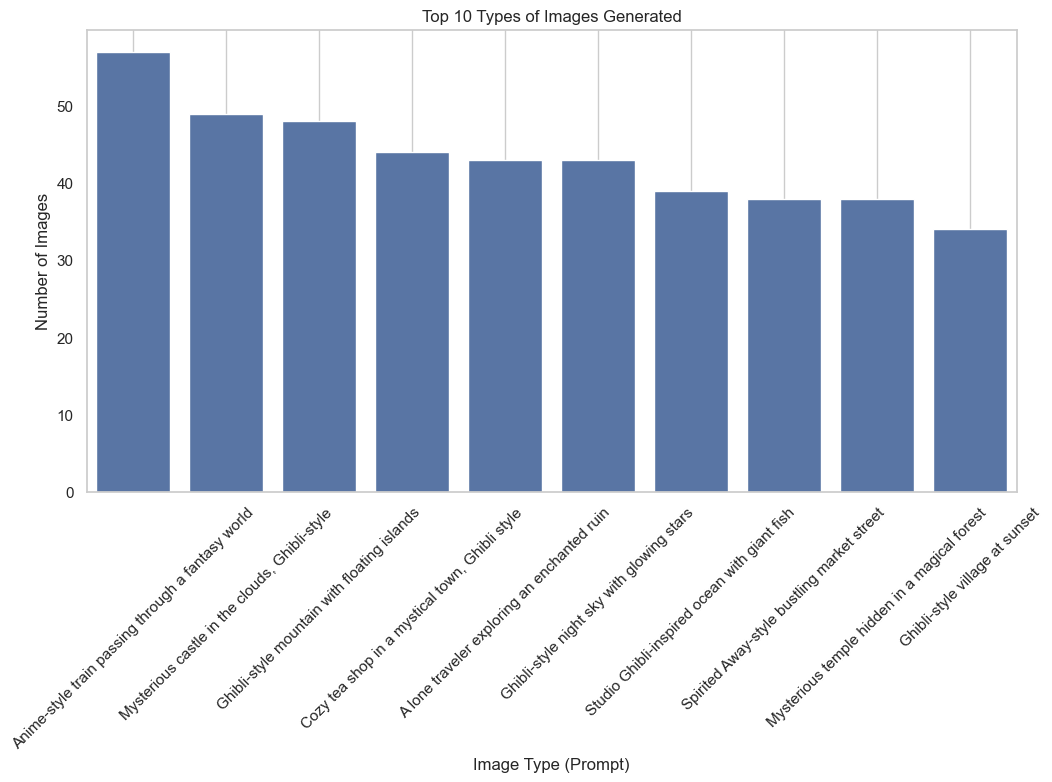

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")

# Question 4: Analyzing the types of images generated
# Counting the occurrences of each type of image
image_types = df['prompt'].value_counts().head(10)  # Top 10 types

plt.figure(figsize=(12, 6))
sns.barplot(x=image_types.index, y=image_types.values)
plt.title('Top 10 Types of Images Generated')
plt.xlabel('Image Type (Prompt)')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## ❓ Question 5: Quelle est la distribution des types d’images selon le score de tendance ?

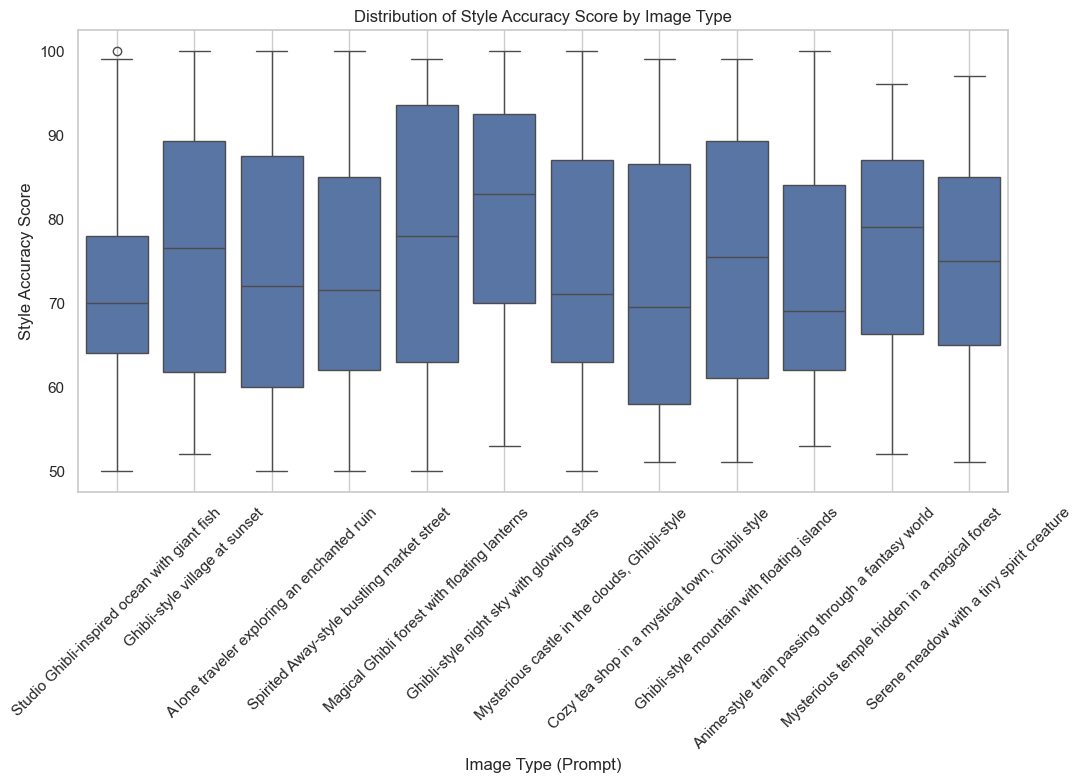

In [20]:
# Question 5: Distribution of image types according to style accuracy score
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='prompt', y='style_accuracy_score')
plt.title('Distribution of Style Accuracy Score by Image Type')
plt.xlabel('Image Type (Prompt)')
plt.ylabel('Style Accuracy Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## ❓ Question 6: Les images les plus populaires sont-elles concentrées sur un certain type ?

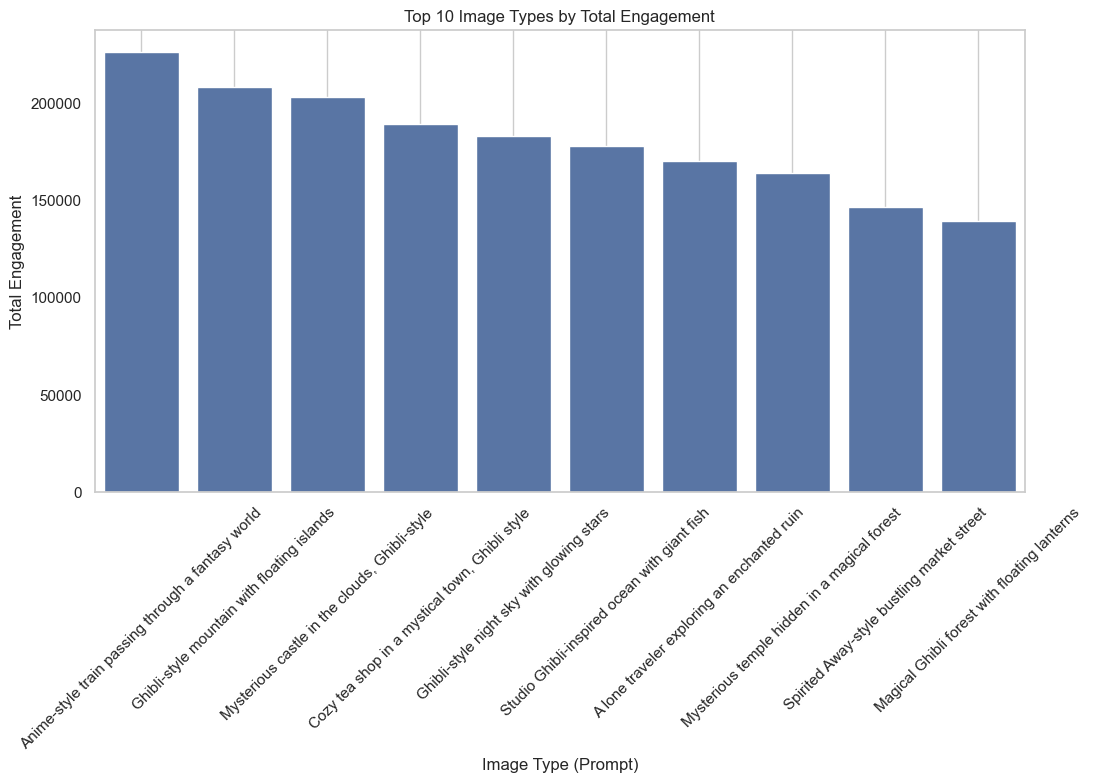

In [21]:
# Question 6: Checking if the most popular images are concentrated in a certain type
# Calculating the popularity based on likes, shares, and comments
# Creating a new column for total engagement

df['total_engagement'] = df['likes'] + df['shares'] + df['comments']

# Finding the top image types based on total engagement
popular_image_types = df.groupby('prompt')['total_engagement'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_image_types.index, y=popular_image_types.values)
plt.title('Top 10 Image Types by Total Engagement')
plt.xlabel('Image Type (Prompt)')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## ❓ Question 7: Quel est l’engagement moyen (likes, comments, shares) par type d’image ?

<Figure size 1200x600 with 0 Axes>

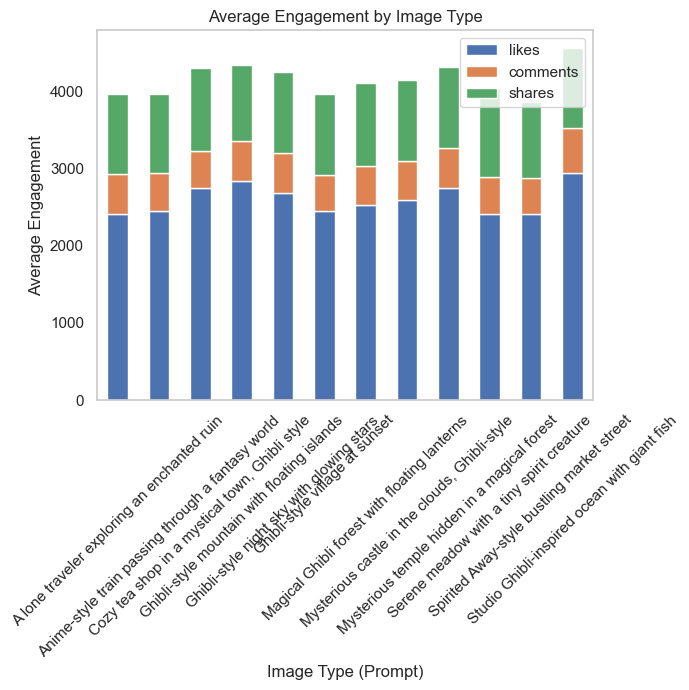

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")

# Question 7: Calculating average engagement (likes, comments, shares) by image type
average_engagement = df.groupby('prompt')[['likes', 'comments', 'shares']].mean()

plt.figure(figsize=(12, 6))
avg_engagement_plot = average_engagement.plot(kind='bar', stacked=True)
plt.title('Average Engagement by Image Type')
plt.xlabel('Image Type (Prompt)')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## ❓ Question 8: Y a-t-il une corrélation entre les likes, shares, comments et le score de tendance ?

                         likes    shares  comments  style_accuracy_score
likes                 1.000000 -0.029318 -0.013297              0.019640
shares               -0.029318  1.000000 -0.006400              0.011279
comments             -0.013297 -0.006400  1.000000             -0.102865
style_accuracy_score  0.019640  0.011279 -0.102865              1.000000


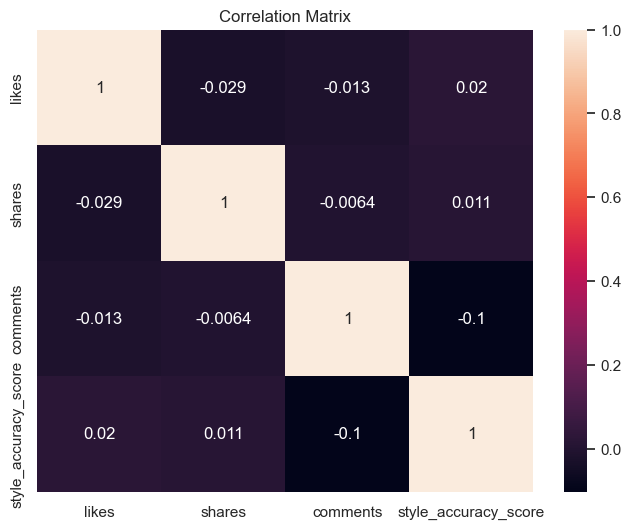

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")
# Question 8: Checking for correlation between likes, shares, comments, and style accuracy score
correlation_matrix = df[['likes', 'shares', 'comments', 'style_accuracy_score']].corr()
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## ❓ Question 9: Quels sont les créateurs les plus prolifiques ?

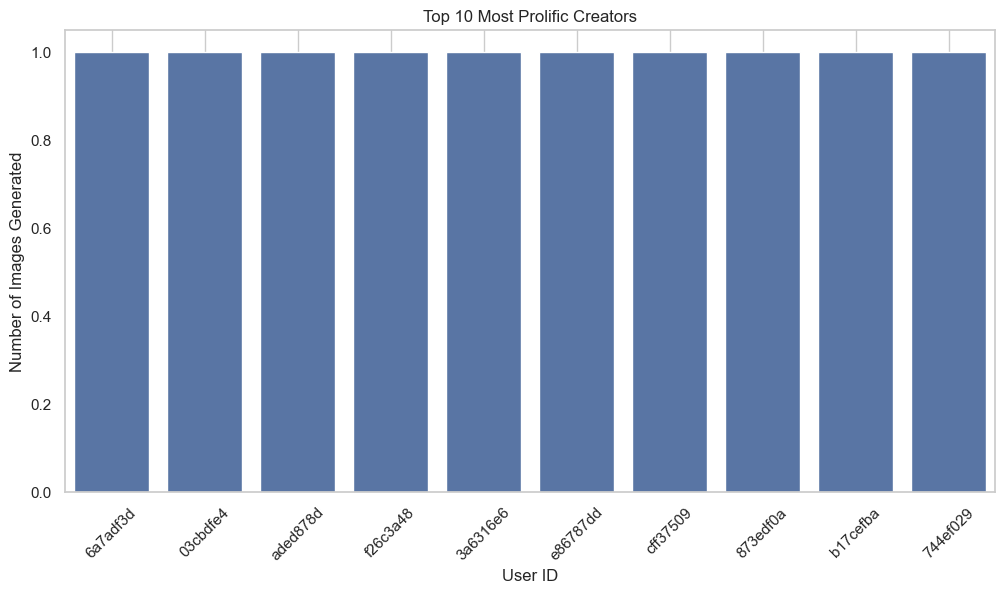

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")

# Question 9: Finding the most prolific creators
# Counting the number of images generated by each user
prolific_creators = df['user_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=prolific_creators.index, y=prolific_creators.values)
plt.title('Top 10 Most Prolific Creators')
plt.xlabel('User ID')
plt.ylabel('Number of Images Generated')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## ❓ Question 10: Les créateurs les plus prolifiques ont-ils aussi les scores les plus élevés ?

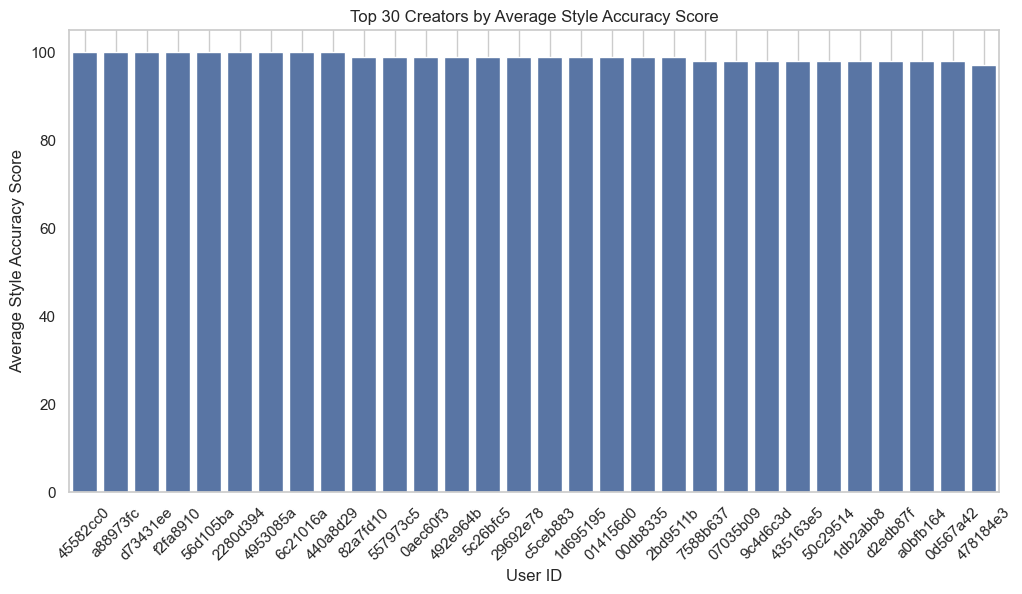

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")
# Question 10: Checking if the most prolific creators also have the highest scores
# Calculating the average style accuracy score for each creator
average_scores_by_creator = df.groupby('user_id')['style_accuracy_score'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_scores_by_creator.index, y=average_scores_by_creator.values)
plt.title('Top 30 Creators by Average Style Accuracy Score')
plt.xlabel('User ID')
plt.ylabel('Average Style Accuracy Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()



## ❓ Question 11: Quelles plateformes ont généré les images avec les scores les plus élevés ?

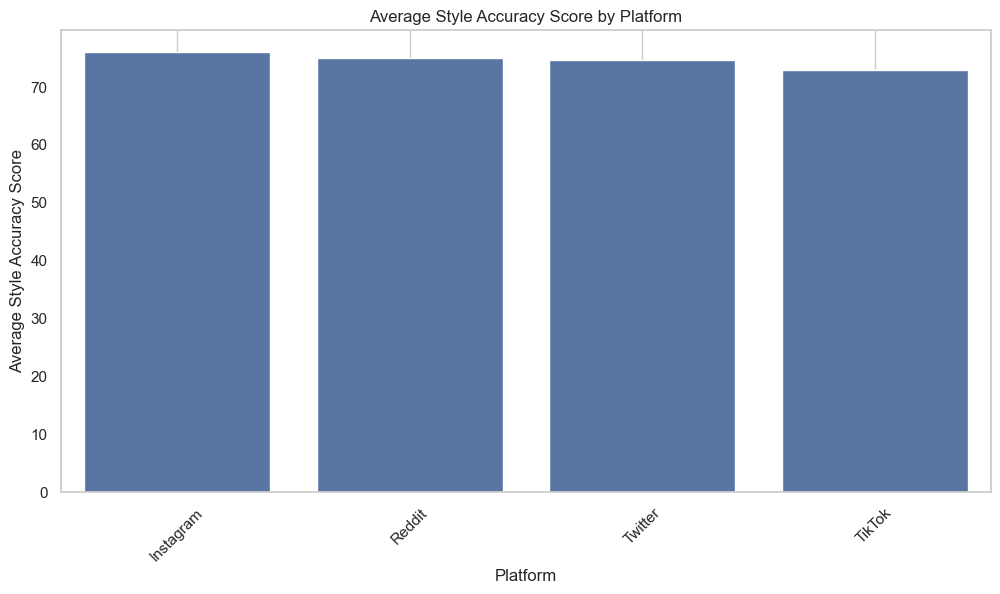

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")

# Question 11: Analyzing which platforms generated images with the highest style accuracy scores
platform_scores = df.groupby('platform')['style_accuracy_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=platform_scores.index, y=platform_scores.values)
plt.title('Average Style Accuracy Score by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Style Accuracy Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## ❓ Question 12: Existe-t-il une saisonnalité dans la création d’images ?

In [53]:
# Question 12: Checking for seasonality in image creation
# Extracting month from creation date

df['month'] = df['creation_date'].dt.month
images_per_month_seasonality = df.groupby('month').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=images_per_month_seasonality.index, y=images_per_month_seasonality.values)
plt.title('Number of Images Created by Month')
plt.xlabel('Month')
plt.ylabel('Number of Images Created')
plt.xticks(rotation=45)
plt.grid()
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

## ❓ Question 13: Le style ou l’image type évolue-t-il dans le temps ?

In [52]:
# Question 13: Analyzing if the style or image type evolves over time
# Grouping by month and counting unique prompts
style_evolution = df.groupby(['month', 'prompt']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.lineplot(data=style_evolution.T)
plt.title('Evolution of Image Styles Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Images')
plt.legend(title='Image Type (Prompt)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

KeyError: 'month'

## ❓ Question 14: Les partages ont-ils un poids plus fort que les commentaires ou likes ?

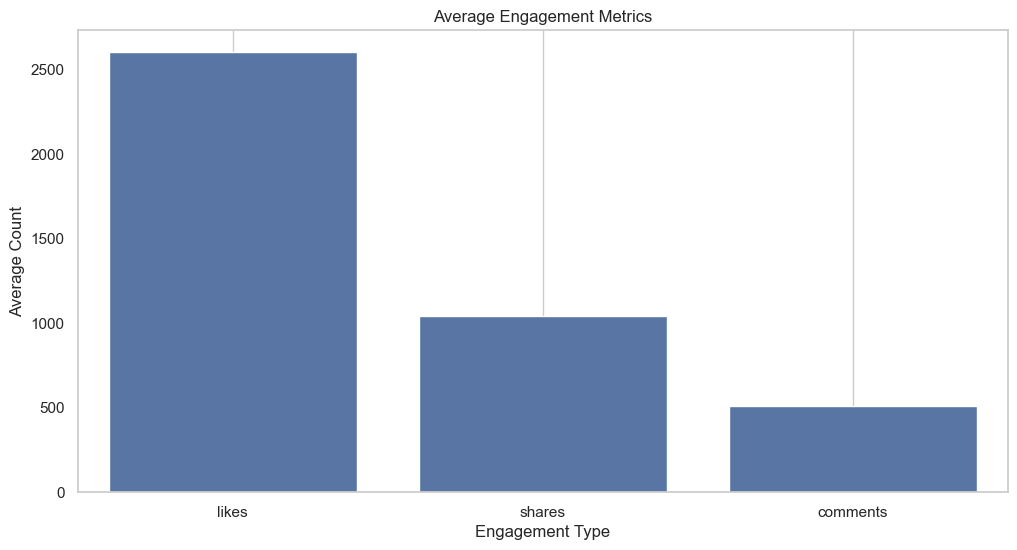

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")
# Question 14: Analyzing if shares have a stronger weight than comments or likes
# Calculating the average engagement metrics
average_engagement_metrics = df[['likes', 'shares', 'comments']].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_engagement_metrics.index, y=average_engagement_metrics.values)
plt.title('Average Engagement Metrics')
plt.xlabel('Engagement Type')
plt.ylabel('Average Count')
plt.grid()
plt.show()


## ❓ Question 15: Y a-t-il des outliers extrêmes dans les données ?

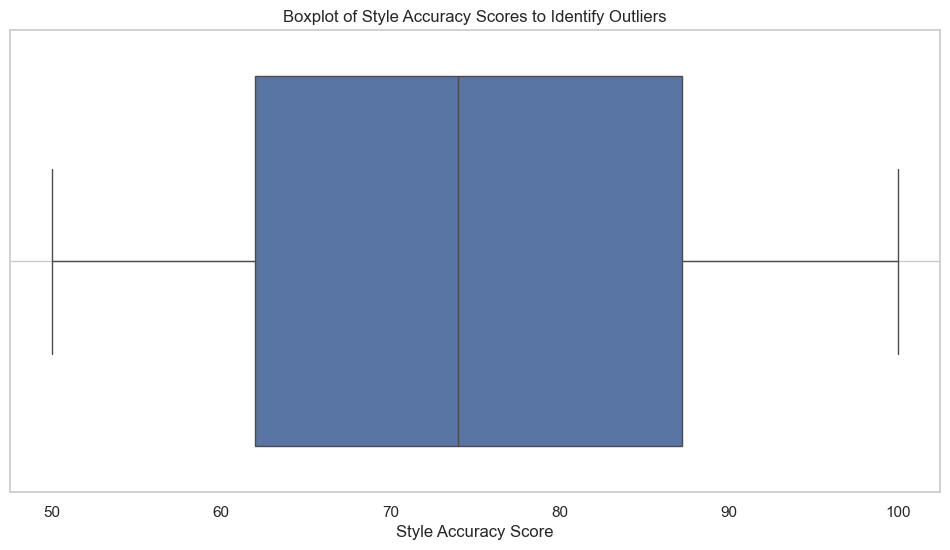

In [50]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("projet_tutore.csv")


# Question 15: Checking for extreme outliers in the data
# Using boxplot to identify outliers in style accuracy scores
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['style_accuracy_score'])
plt.title('Boxplot of Style Accuracy Scores to Identify Outliers')
plt.xlabel('Style Accuracy Score')
plt.grid()
plt.show()